In [1]:
# install libraries
import influxdb_client
import pandas as pd
import secret
import sensor_data_functions
from weather_data_functions import get_current_weather, get_historical_weather
import matplotlib.pyplot as plt
import requests
from datetime import datetime

In [12]:
lookback = '5h'
generation_df, consumption_df = sensor_data_functions.get_sensor_data(lookback)
generation_df.head()

,power
datetime,
2023-12-19 04:23:51+00:00,0.084679
2023-12-19 04:23:52+00:00,0.085316
2023-12-19 04:23:53+00:00,0.084845
2023-12-19 04:23:54+00:00,0.085101
2023-12-19 04:23:55+00:00,0.085009


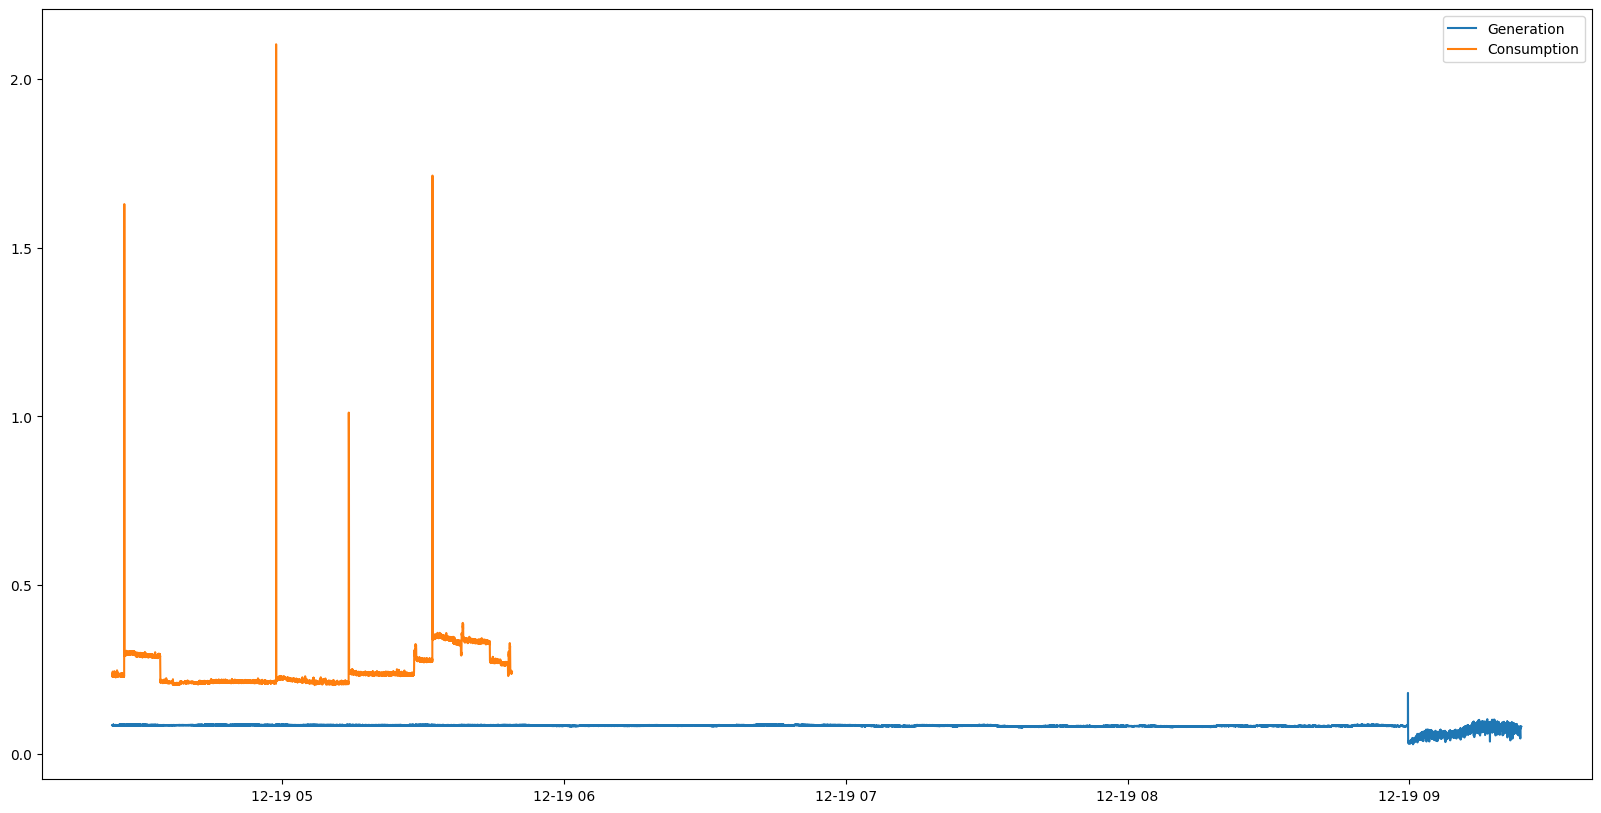

In [13]:
# plot both generation and consumption
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(generation_df.index, generation_df['power'], label='Generation')
ax.plot(consumption_df.index, consumption_df['power'], label='Consumption')
ax.legend()

In [5]:
postcode = 'WR7 4BU'
current_weather = get_current_weather(postcode)
current_weather

,last_updated_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,wind_dir,pressure_mb,pressure_in,...,humidity,cloud,feelslike_c,feelslike_f,vis_km,vis_miles,uv,gust_mph,gust_kph,condition
last_updated,,,,,,,,,,,,,,,,,,,,,
2023-12-18 13:45,1702907100,12.0,53.6,1,12.5,20.2,210,SSW,1025.0,30.27,...,94,75,9.5,49.1,10.0,6.0,3.0,23.5,37.8,Partly cloudy


In [6]:
postcode = 'WR7 4BU'
date_time = datetime(year=2023, month=12, day=14)

weather = get_historical_weather(postcode, date_time)
weather.head()

,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,wind_dir,pressure_mb,pressure_in,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,uv,condition
time,,,,,,,,,,,,,,,,,,,,,
2023-12-14 00:00,1702512000,2.1,35.8,0,4.0,6.5,288,WNW,1016.0,30.01,...,0,0,0,0,10.0,6.0,7.9,12.6,1.0,Cloudy
2023-12-14 01:00,1702515600,1.8,35.2,0,3.8,6.1,268,W,1017.0,30.02,...,0,0,0,0,10.0,6.0,7.5,12.0,1.0,Clear
2023-12-14 02:00,1702519200,2.0,35.6,0,4.7,7.6,257,WSW,1017.0,30.05,...,0,0,0,0,10.0,6.0,8.9,14.3,1.0,Overcast
2023-12-14 03:00,1702522800,2.3,36.2,0,4.5,7.2,222,SW,1017.0,30.04,...,0,0,0,0,10.0,6.0,8.3,13.3,1.0,Overcast
2023-12-14 04:00,1702526400,3.0,37.4,0,4.5,7.2,216,SW,1017.0,30.04,...,0,0,0,0,10.0,6.0,7.8,12.6,1.0,Overcast


In [9]:
# create code to get irradiance data
lat = 52.2
lon = 0.1
date_time = datetime(year=2023, month=12, day=14)
date_string = date_time.strftime('%Y-%m-%d')

url = f"https://api.openweathermap.org/energy/1.0/solar/data?lat={lat}&lon={lon}&date={date_string}&appid={secret.openweathermap_api_key}"

response = requests.get(url)
weather_data = response.json()
weather_data



{'cod': 401,
 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}